In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [58]:
values = np.random.randn(365, 4).cumsum(axis=0) # standard normal data
values

array([[-1.3055644 , -0.40541606,  0.49159954,  0.67304477],
       [-2.25939636, -0.67902215,  1.6288704 ,  1.23231502],
       [-3.11192686, -1.08384952, -0.37619112,  1.35504323],
       ...,
       [16.11194438,  0.90860591, -2.65913157, -7.37819713],
       [18.06864128,  2.68324941, -3.75355683, -5.76128315],
       [18.28584023,  3.54530233, -4.87334291, -5.58087711]])

In [59]:
dates = pd.date_range("1 1 2016", periods=365, freq="D")
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [60]:
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data

,A,B,C,D
2016-01-01,-1.305564,-0.405416,0.491600,0.673045
2016-01-02,-2.259396,-0.679022,1.628870,1.232315
2016-01-03,-3.111927,-1.083850,-0.376191,1.355043
2016-01-04,-3.272481,0.640598,-0.534346,1.781505
2016-01-05,-3.507508,-0.538202,0.160200,-0.119923
...,...,...,...,...
2016-12-26,16.589586,0.115758,-5.083276,-8.124286
2016-12-27,17.459350,0.477468,-3.337390,-7.655342
2016-12-28,16.111944,0.908606,-2.659132,-7.378197
2016-12-29,18.068641,2.683249,-3.753557,-5.761283


In [61]:
# https://towardsdatascience.com/dont-miss-out-on-rolling-window-functions-in-pandas-850b817131db
# sử dụng window function với phép toán mean, 7 ngày trong tuần
data = data.rolling(7).mean() 
data.head(10)

,A,B,C,D
2016-01-01,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,-2.934860,-0.485411,-0.096607,0.631782
2016-01-08,-3.195563,-0.640910,-0.074257,0.428420
2016-01-09,-3.319385,-0.924314,-0.154226,0.197242
2016-01-10,-3.329201,-1.321002,-0.172036,0.004682


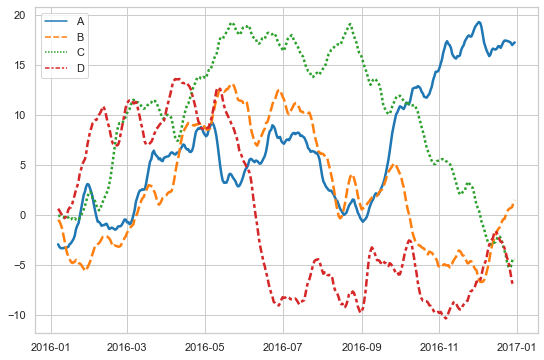

In [62]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=data, palette="tab10", linewidth=2.5);

In [63]:
museum_visitors = pd.read_csv('data/museum_visitors.csv', index_col=0, parse_dates=True)

In [64]:
museum_visitors.shape

(59, 4)

In [65]:
museum_visitors.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [66]:
museum_visitors.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


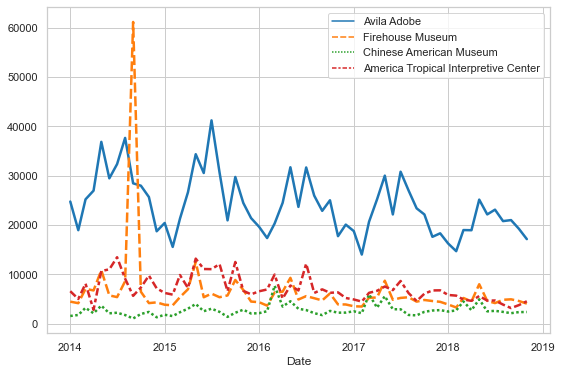

In [67]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=museum_visitors, palette="tab10", linewidth=2.5);

In [68]:
# các bảo tàng Chinese American Museum và America Tropical Interpretive Center có lượng khách tham quan thấp nhưng ổn định
# bảo tàng Firehouse Museum vào thời điểm cuối năm 2014 có lượng khách tham quan cao nhất (>60000), sau đó thì giảm rất nhanh
# bảo tàng Avila Adobe có lượng khách cao và ổn định